# Import Statements

In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# One Hot Encoding the Target Classes

In [2]:
# 0 - Tumor
# 1 - Normal
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

# Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [3]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'D:/brain tumorr/archive (6)/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
paths = []
for r, d, f in os.walk(r"D:/brain tumorr/archive (6)/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

# Splitting the Data into Training & Testing

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [9]:
y_train.shape

(111, 2)

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 13s 2s/step - loss: 17.9979 - val_loss: 26.8840
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 14.6179 - val_loss: 52.0781
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 4.0215 - val_loss: 8.7736
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 4.2287 - val_loss: 6.2801
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 0.9928 - val_loss: 12.3584
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 1.9451 - val_loss: 11.0654
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 1.1301 - val_loss: 5.0486
Epoch 8/30
3/3 [==============================] - 5s 2s/step - loss: 0.4456 - val_loss: 5.4551
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 1.0648 - val_loss: 6.8476
Epoch 10/30
3/3 [==============================] - 5s 2s/step - loss: 0.7687 - val_loss: 4.7964
Epoch 11/30
3/3 [=========================

# Plotting Losses

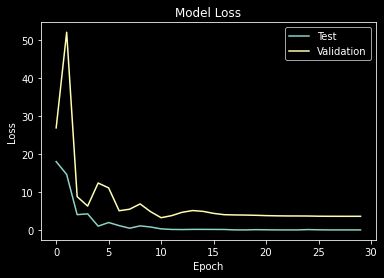

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

#  Checking the Model

In [12]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


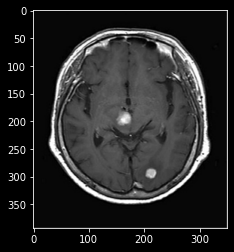

In [13]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:/brain tumorr/archive (6)/brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.9951958656311% Confidence This Is A Its a Tumor


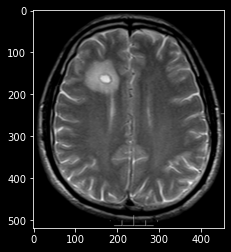

In [14]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:/brain tumorr/archive (6)/brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))